In [1]:
import numpy as np
import pandas as pd


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!python -m wget $data


Saved under data (1).csv


In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [7]:
cats = list(df.select_dtypes(include='object').columns)

In [8]:
%%time
for col in cats:
    df[col] = df[col].str.lower().str.replace(" ","_")

Wall time: 51 ms


In [9]:
%%time
df[cats] = df[cats].apply(lambda x: x.str.lower().str.replace(" ","_"))

Wall time: 53 ms


In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [12]:
for col in df.columns:
    print(col)
    print(df[col].sample(5))
    print()

make
10927       toyota
10956       toyota
2312     chevrolet
164            bmw
1037          audi
Name: make, dtype: object

model
11708                    xl7
6947                 montana
635      6_series_gran_coupe
460                     456m
10551       town_and_country
Name: model, dtype: object

year
1418    2016
9060    2009
1923    2015
5375    2015
9205    2015
Name: year, dtype: int64

engine_fuel_type
2804                  regular_unleaded
6533          flex-fuel_(unleaded/e85)
4198    premium_unleaded_(recommended)
1060    premium_unleaded_(recommended)
9320                  regular_unleaded
Name: engine_fuel_type, dtype: object

engine_hp
2033    185.0
160     248.0
2121    172.0
7703    121.0
9650    200.0
Name: engine_hp, dtype: float64

engine_cylinders
312     6.0
679     6.0
1296    6.0
8862    5.0
255     4.0
Name: engine_cylinders, dtype: float64

transmission_type
3419     automatic
6383        manual
10927    automatic
1588     automatic
11122    automatic
Name

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

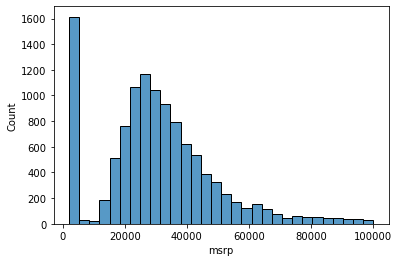

In [28]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 30)

In [31]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

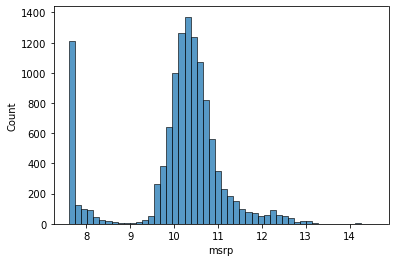

In [33]:
sns.histplot(price_logs, bins=50)

# Missing Values

In [34]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [40]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [53]:
df_shuffled = df.sample(frac=1,random_state=2)

In [54]:
df_val = df_shuffled.iloc[:n_val]
df_test = df_shuffled.iloc[n_val:n_val+n_test]
df_train = df_shuffled.iloc[n_val+n_test:]

In [57]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [59]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [60]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

In [77]:
w_new = [w0] + w

In [78]:
def dot (xi,w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [79]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [80]:
linear_regression(xi)

9.312

In [81]:
w0 = 4.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [82]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])

# Vector form

array([ 9.38 , 10.552,  9.312])

In [84]:
def linear_regression(X):
    return X.dot(w_new)

In [85]:
linear_regression(X)

array([ 9.38 , 10.552,  9.312])